# <center>Network Science</center>

## <center>Home Assignment #3: Centralities and Assortativity</center>

### <center>Student: *Shiryaev Vyacheslav*</center>

## Problems

### Task 1

Compute degree centrality, Pagerank and  HubAuthorities scores for the [flickr](https://www.hse.ru/data/2016/02/24/1139618969/flickr.mat) network. 

Data contains sparse matrix A and list of user names.
This is a “denser” part of the Flickr photo sharing site friendship graph from 2006. Edge direction corresponds to friendship requests (following). Some of the links are reciprocal,others not.  

Provide top 50 names in each ranking, compare results

### Solution

Firstly, let's import all packages that we will be used:

In [9]:
# -*- coding: utf-8 -*-
from __future__ import division
import matplotlib
import matplotlib.pyplot as plt
plt.xkcd()
import numpy as np
import numpy.matlib
import pandas as pd
import scipy as sp
import random
from itertools import groupby
import networkx as nx
%matplotlib inline
import scipy.io
import scipy.stats

Now, it is possible to load data and convert into graph format

In [3]:
flickr_data = scipy.io.loadmat('flickr.mat')
# change format
create_using = nx.DiGraph()
G = nx.from_scipy_sparse_matrix(flickr_data['A'], create_using = create_using)

In [36]:
G_test = nx.DiGraph(data=flickr_data['A'])

And estimate all required metrics

In [4]:
# metrics estimation
d_centr = nx.degree_centrality(G)
pagerank = nx.pagerank(G)
hits = nx.hits(G)

In [5]:
# sort all metrics
dc_sorted_index = sorted(d_centr, key=d_centr.get, reverse=True)[:50]
pagerank_sorted_index = sorted(pagerank, key=pagerank.get, reverse=True)[:50]
hubs_sorted_index = sorted(hits[0], key=hits[0].get, reverse=True)[:50]
authorities_sorted_index = sorted(hits[1], key=hits[1].get, reverse=True)[:50]

dc_sorted = [ flickr_data['names'][i] for i in dc_sorted_index]
pagerank_sorted = [ flickr_data['names'][i] for i in pagerank_sorted_index]
authorities_sorted = [ flickr_data['names'][i] for i in authorities_sorted_index]
hubs_sorted = [ flickr_data['names'][i] for i in hubs_sorted_index]

All data are in the same dataframe to better view and comparison

In [20]:
metrics_matrix = np.matrix([dc_sorted, pagerank_sorted, authorities_sorted, hubs_sorted]).T
col = ['Degree centrality', 'Page rank', 'Authorities', 'Hubs']

metrics_df = pd.DataFrame(metrics_matrix, np.arange(1,51), columns = col)
metrics_df

,Degree centrality,Page rank,Authorities,Hubs
1,awfulsara ...,awfulsara ...,awfulsara ...,mrpiink ...
2,drp ...,drp ...,drp ...,automat ...
3,DrJoanne ...,antimethod ...,DrJoanne ...,schizoo23 ...
4,antimethod ...,BombDog ...,*Ivan* ...,lorrainemd ...
5,*Ivan* ...,*Ivan* ...,antimethod ...,sgoralnick ...
6,BombDog ...,MaD GiÂ®Lâ¢â¢ ...,BombDog ...,*starlet* ...
7,deborah lattimore ...,DrJoanne ...,Simon Pais ...,brynfoto ...
8,Simon Pais ...,Simon Pais ...,deborah lattimore ...,liquid pixel ...
9,cymagen ...,deborah lattimore ...,cymagen ...,noahstone ...
10,notraces ...,cymagen ...,:Nikola ...,isherwood ...


As it can be seen from the table. Degree centrality, Pagerank and Authorities values have particulary the same ordering at the beginning. However, the more farther from the beginning the more differencies between results of these metrics can be founded.

In order to be more sure about the comparison, let's compute Kendall tau for out rankings.

In [23]:
rankings = list(metrics_df.columns)
metrics_index_df = metrics_df
metrics_index_df['Degree centrality'] = dc_sorted_index
metrics_index_df['Page rank'] = pagerank_sorted_index
metrics_index_df['Authorities'] = authorities_sorted_index
metrics_index_df['Hubs'] = hubs_sorted_index
#print rankings
s = [[0]*4, [0]*4, [0]*4, [0]*4]
#print s
for rank_n1 in range(len(rankings)):
    for rank_n2 in range(len(rankings)):
        s[rank_n1][rank_n2] = sp.stats.kendalltau(metrics_df[rankings[rank_n1]], metrics_df[rankings[rank_n2]])[0]
            
dif = pd.DataFrame(s, index = rankings, columns = rankings)
dif

,Degree centrality,Page rank,Authorities,Hubs
Degree centrality,1.000000,0.126531,-0.051429,-0.015510
Page rank,0.126531,1.000000,-0.216327,-0.131429
Authorities,-0.051429,-0.216327,1.000000,0.004082
Hubs,-0.015510,-0.131429,0.004082,1.000000


As we can see PageRank and Degree Centrality are correlated (τ>0) and HUBS and Authorities are slightly correlated as well. However, PageRank and Degree Centrality are not really good correlated with Hubs and Authorities in terms of Kendall tau (τ<0).

### <hr /> Task 2

Here are the [Facebook friendship graphs](https://www.hse.ru/data/2016/03/05/1125656999/universities.zip) from several US universities from 2005 (one year after fb launch).

Data contains a A matrix (sparse) and a "local_info" variable, one row per node: 
a student/faculty status flag, gender, major, second major/minor (if applicable), dorm/house, year, and high school. 
Missing data is coded 0.

Compute node degree assortativity (mixining by node degree) and assortativity coefficient (modularity) for gender, major, dormitory, year, high school for all universities and compare the results.

### Solution

Data have nodes attributes. Thus, special function to generate graph from these files is needed.

In [42]:
# generate graph from files
def gen_graph_from_file(filename):
    data = scipy.io.loadmat(filename + '.mat')
    create_using = nx.DiGraph()
    G = nx.from_scipy_sparse_matrix(data['A'], create_using = create_using)
    features = data['local_info']
    
    columns = {'gender': 1, 'major': 2, 'dormitory': 4, 'year': 5, 'high school': 6}
    for i, j in columns.items():
        features_dict = {k: v for k, v in enumerate(features[:,j])}
        nx.set_node_attributes(G, i, features_dict)
        
    return G

Now, it's bulding graphs from files will be easy. Also, as graph generates, Compute node degree assortativity and assortativity coefficient by attribute computes as well.

In [44]:
filenames = ('Berkeley13', 'Caltech36', 'Harvard1', 'Oklahoma97', 'Princeton12', 'Texas80')
attributes = ('gender', 'major', 'dormitory', 'year', 'high school')
deg_assort = []
attr_assort = []
for filename in filenames:
    G = gen_graph_from_file(filename)
    deg_assort.append(nx.degree_assortativity_coefficient(G))
    assort = []
    for attr in attributes:
        assort.append(nx.attribute_assortativity_coefficient(G, attr))
    attr_assort.append(assort)

In [61]:
print 'Node degree assortativity'
deg_assort_df = pd.DataFrame(np.array(deg_assort), index = filenames, columns=['Node degree assortativity'])
deg_assort_df

Node degree assortativity


,Node degree assortativity
Berkeley13,0.010313
Caltech36,-0.065273
Harvard1,0.145055
Oklahoma97,0.073673
Princeton12,0.091092
Texas80,0.163892


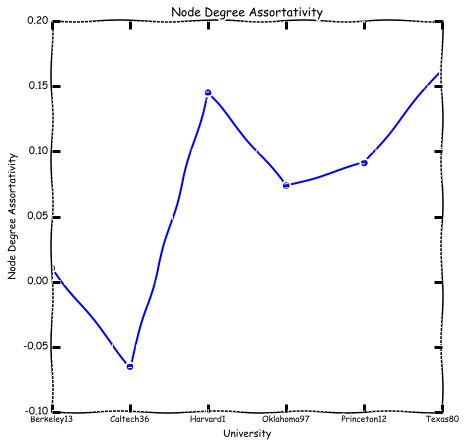

In [70]:
fig, ax = plt.subplots()
fig.set_size_inches(7,7)
ax.plot(range(len(filenames)), deg_assort, marker = 'o')
plt.title('Node Degree Assortativity')
plt.xlabel('University')
plt.ylabel('Node Degree Assortativity')
plt.grid()
s = plt.xticks(range(len(filenames)), filenames, size='small')

As it can be seen from the picture and table, the highest similarity of connections in the graph with respect to the node degree are in Texas and Harvard, and the smallest ones are on Caltech and Berkeley.

In [65]:
print 'Assortativity coefficient by attributes'
attr_assort_df = pd.DataFrame(np.matrix(attr_assort), index = filenames, columns=attributes)
attr_assort_df

Assortativity coefficient by attributes


,gender,major,dormitory,year,high school
Berkeley13,0.040923,0.058255,0.147276,0.308121,0.077375
Caltech36,0.046331,0.034719,0.349153,0.237532,0.002670
Harvard1,0.045270,0.049677,0.125677,0.421160,0.023987
Oklahoma97,0.092837,0.036379,0.280335,0.201165,0.139468
Princeton12,0.050611,0.054390,0.094678,0.446745,0.018784
Texas80,0.079693,0.059713,0.204838,0.246195,0.147993


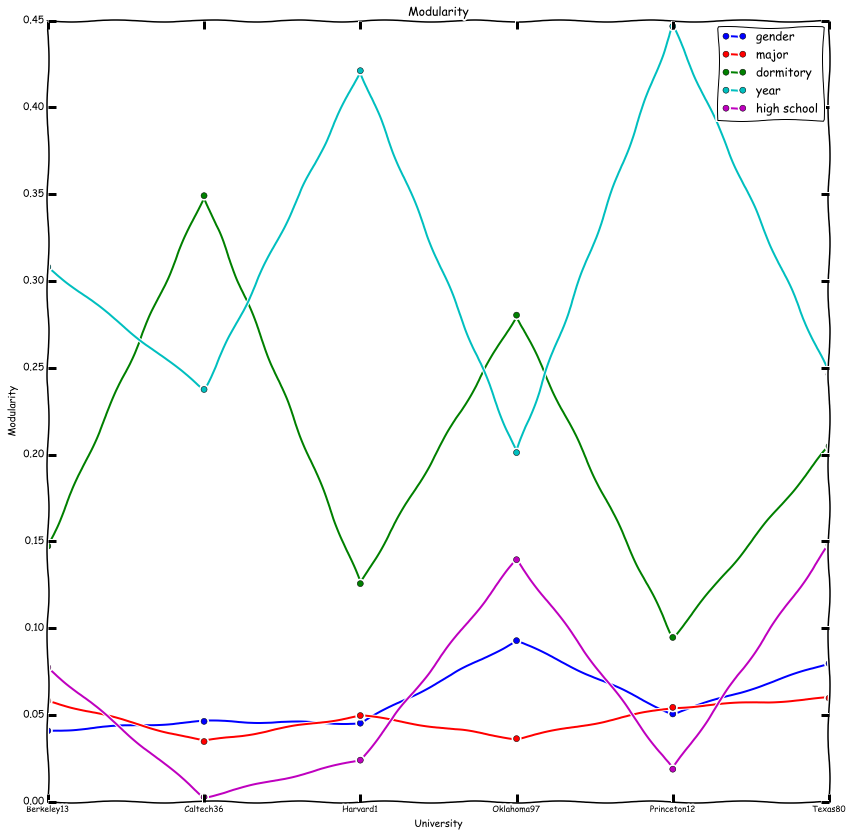

In [102]:
fig, ax2 = plt.subplots()
fig.set_size_inches(14,14)

colors = ('b', 'r', 'g', 'c', 'm', 'y')

k = 0
for i in np.array(attr_assort).transpose():
    plt.plot(range(len(filenames)), i, marker = 'o', color = colors[k])
    k += 1
plt.title('Modularity')
plt.xlabel('University')
plt.ylabel('Modularity')

plt.legend(attributes)
s = plt.xticks(range(len(filenames)), filenames, size='small')

attr_assort.index(0.058255)

Year and dormitory attributes have the highest modularity score. Other attributes values are quite similar. It is mean, that people have better relationships with same age people. Also, relationship is depend on the place, where students live. It is interesting to nate, that year and dormitory attributes redlects like a mirror. I think, this is relly depends on the university community and structure. May be, there dormitory is higher than year, students lives mostly in dormitories or alongside. There are the second interesting point. High school have weak influence on the student communication groups in the popular universities such as Harvard, Princeton, Barkley, Caltech, there students where students are from all over the world. However, in other unuiversities high-schoole can have an impact on the communication.